In [1]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns

In [41]:
#import file
iris_dt=pd.read_csv('iris.csv')

#randomly print 10 rows
iris_dt.sample(n=10)

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
37,4.9,3.1,1.5,0.1,Iris-setosa
79,5.7,2.6,3.5,1.0,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
122,7.7,2.8,6.7,2.0,Iris-virginica
109,7.2,3.6,6.1,2.5,Iris-virginica
132,6.4,2.8,5.6,2.2,Iris-virginica
57,4.9,2.4,3.3,1.0,Iris-versicolor
66,5.6,3.0,4.5,1.5,Iris-versicolor
2,4.7,3.2,1.3,0.2,Iris-setosa
54,6.5,2.8,4.6,1.5,Iris-versicolor


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [42]:
print iris_dt.fillna(int(iris_dt.mean()))

print iris_dt.dropna()

TypeError: cannot convert the series to <type 'int'>

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [43]:
iris_dt=iris_dt.replace(['Iris-setosa','Iris-versicolor','Iris-virginica'],[0,1,2])


In [44]:
iris_dt

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [45]:
iris_dt.corr

<bound method DataFrame.corr of      Sepal Length (in cm)  Sepal Width in (cm)  Petal length (in cm)  \
0                     5.1                  3.5                   1.4   
1                     4.9                  3.0                   1.4   
2                     4.7                  3.2                   1.3   
3                     4.6                  3.1                   1.5   
4                     5.0                  3.6                   1.4   
5                     5.4                  3.9                   1.7   
6                     4.6                  3.4                   1.4   
7                     5.0                  3.4                   1.5   
8                     4.4                  2.9                   1.4   
9                     4.9                  3.1                   1.5   
10                    5.4                  3.7                   1.5   
11                    4.8                  3.4                   1.6   
12                    4.8       

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [49]:
iris_dt.var


<bound method DataFrame.var of      Sepal Length (in cm)  Sepal Width in (cm)  Petal length (in cm)  \
0                     5.1                  3.5                   1.4   
1                     4.9                  3.0                   1.4   
2                     4.7                  3.2                   1.3   
3                     4.6                  3.1                   1.5   
4                     5.0                  3.6                   1.4   
5                     5.4                  3.9                   1.7   
6                     4.6                  3.4                   1.4   
7                     5.0                  3.4                   1.5   
8                     4.4                  2.9                   1.4   
9                     4.9                  3.1                   1.5   
10                    5.4                  3.7                   1.5   
11                    4.8                  3.4                   1.6   
12                    4.8        

## Question 6

*Plot the scatter matrix for all the variables.*

Text(0,0.5,'Sepal width (in cm)')

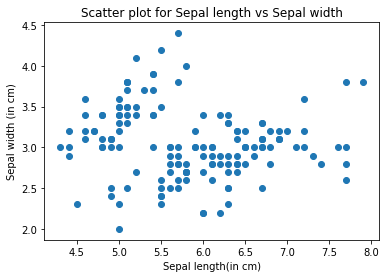

In [56]:
plt.scatter(iris_dt['Sepal Length (in cm)'],iris_dt['Sepal Width in (cm)'])
plt.title('Scatter plot for Sepal length vs Sepal width')
plt.xlabel('Sepal length(in cm)')
plt.ylabel('Sepal width (in cm)')


Text(0,0.5,'Sepal width (in cm)')

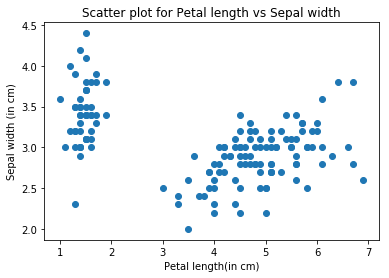

In [57]:
plt.scatter(iris_dt['Petal length (in cm)'],iris_dt['Sepal Width in (cm)'])
plt.title('Scatter plot for Petal length vs Sepal width')
plt.xlabel('Petal length(in cm)')
plt.ylabel('Sepal width (in cm)')

Text(0,0.5,'Sepal width (in cm)')

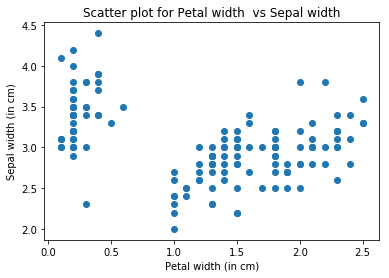

In [59]:
plt.scatter(iris_dt['Petal width (in cm)'],iris_dt['Sepal Width in (cm)'])
plt.title('Scatter plot for Petal width  vs Sepal width')
plt.xlabel('Petal width (in cm)')
plt.ylabel('Sepal width (in cm)')

Text(0,0.5,'Sepal width (in cm)')

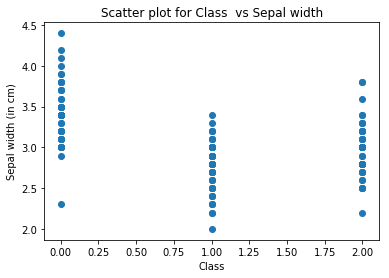

In [60]:
plt.scatter(iris_dt['Class'],iris_dt['Sepal Width in (cm)'])
plt.title('Scatter plot for Class  vs Sepal width')
plt.xlabel('Class')
plt.ylabel('Sepal width (in cm)')

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [62]:
# Split X and y into training and test set in 80:20 ratio
iris_dt.describe().transpose()
bc_feature_df = iris_dt.drop(labels= "Class" , axis = 1)
bc_feature_df_z = bc_feature_df.apply(zscore) 

bc_labels = iris_dt["Class"]
X = np.array(bc_feature_df_z)

y = np.array(bc_labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [65]:

NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
NNH.fit(X_train, y_train)
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.9666666666666667

## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*